[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%203/Leçon_3_Demo_Alias.ipynb)

# ELE8812 - Représentation fréquentielle

## Démo : Effet du sous échantillonnage sur une image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


In [3]:
# Charger image
A = plt.imread('Repo/Data/Barbara.tif');
A = np.double(A)/256

## Sous-échantillonage par décimation

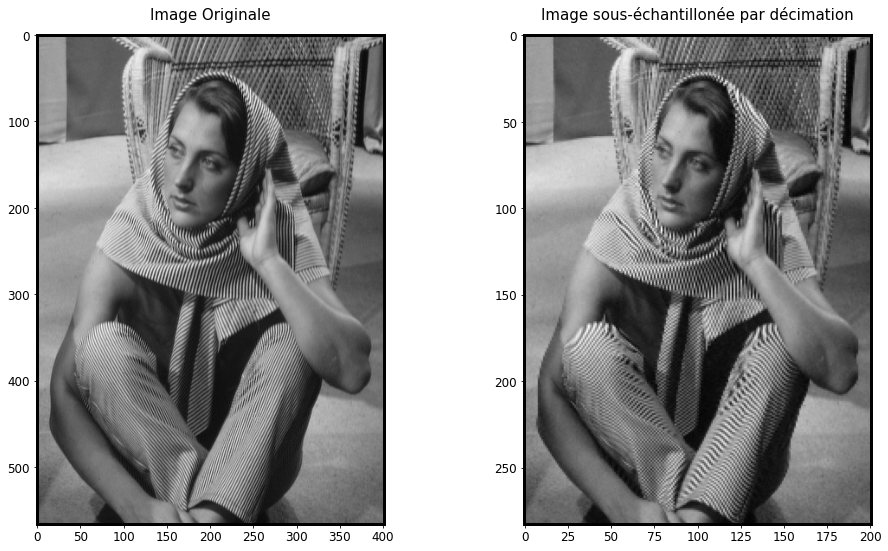

In [4]:
[M, N] = A.shape
C1 = A[0:M:2, 0:N:2];

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale')
plt.subplot(122); plt.imshow(C1, cmap='gray'); plt.title('Image sous-échantillonée par décimation')
plt.show()  

## Sous-échantillonage dans le domain fréquentiel

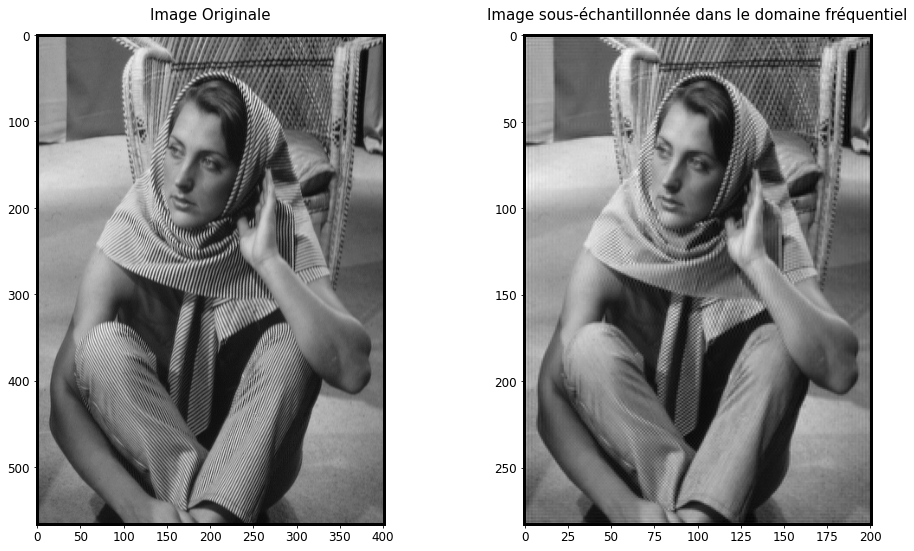

In [5]:
M1 = int(4*np.ceil(M/4));
N1 = int(4*np.ceil(N/4));

AA = np.fft.fft2(A, (M1,N1));
AA[int(M1/4):3*int(M1/4), int(N1/4):3*int(N1/4)] = 0

CC = np.zeros((int(M1/2),int(N1/2)), dtype=AA.dtype)

CC[0:int(M1/4),0:int(N1/4)] = AA[0:int(M1/4),0:int(N1/4)]
CC[0:int(M1/4),int(N1/4):int(N1/2)] = AA[0:int(M1/4),int(3*N1/4):N1]
CC[int(M1/4):int(M1/2),0:int(N1/4)] = AA[int(3*M1/4):M1,0:int(N1/4)]
CC[int(M1/4):int(M1/2),int(N1/4):int(N1/2)] = AA[int(3*M1/4):M1,int(3*N1/4):N1]

C = np.real(np.fft.ifft2((CC)))

C = C[0:int(M/2), 0:int(N/2)]/4

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale')
plt.subplot(122); plt.imshow(C, cmap='gray'); plt.title('Image sous-échantillonnée dans le domaine fréquentiel')
plt.show()  

## Différence entre les 2 méthodes d'échantillonage

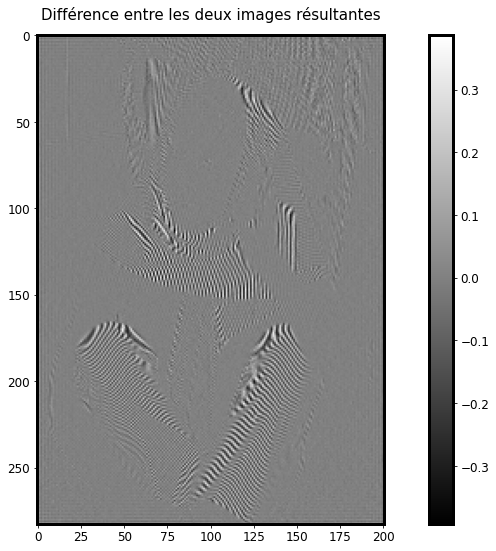

In [6]:
plt.imshow(C-C1, cmap='gray')
plt.title('Différence entre les deux images résultantes')
plt.colorbar()
plt.show()

## Sous-échantillonage par décimation puis ré-interpolation

In [7]:
def mae_bil(im, sc):
    """ Interpolation bilinéaire d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.
    
    Return:
        nd.array: Image interporlée.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonnées de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)
    
    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)  

    # Interpolation bilinéaire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]
    
    return ims

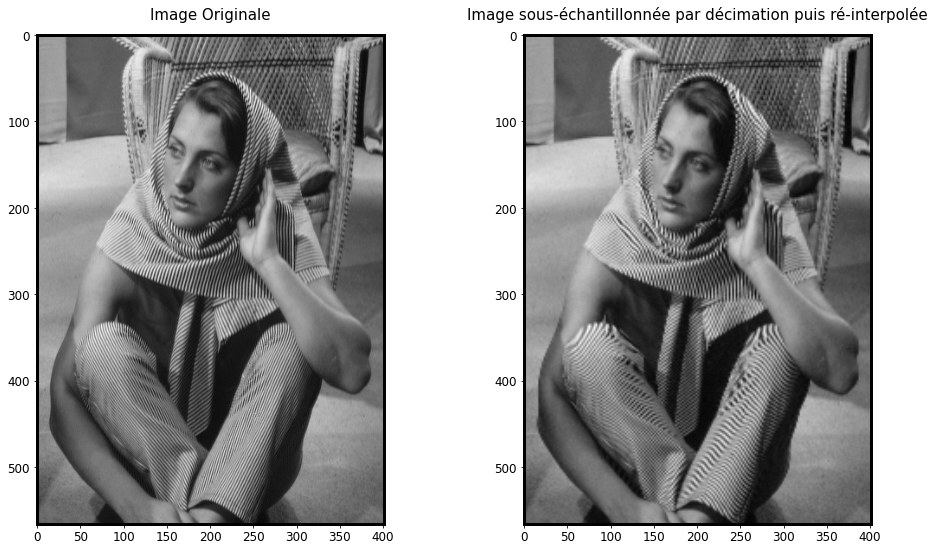

In [8]:
[M, N] = A.shape
C1 = A[0:M:2, 0:N:2];
B1 = mae_bil(C1, 2);

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale')
plt.subplot(122); plt.imshow(B1, cmap='gray'); plt.title('Image sous-échantillonnée par décimation puis ré-interpolée')
plt.show()  

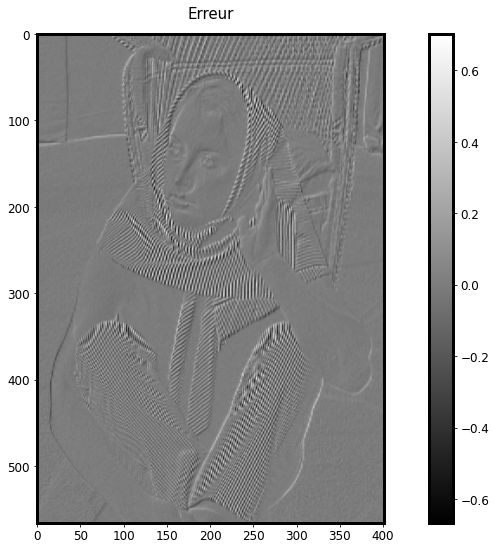

In [9]:
plt.imshow(A-B1, cmap='gray'); plt.colorbar(); plt.title('Erreur')
plt.show()

## Sous-échantillonage et ré-interpolation dans le domaine fréquentiel

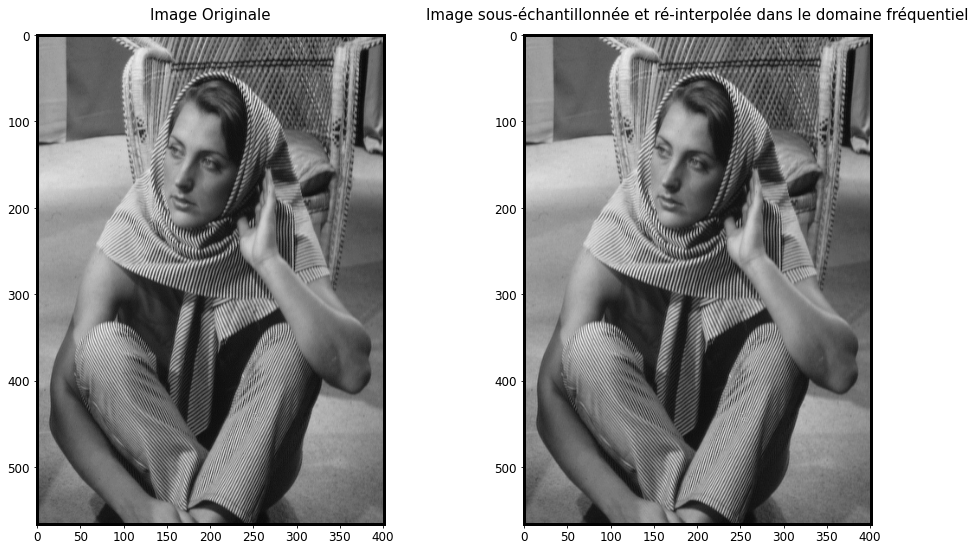

In [10]:
M1 = int(4*np.ceil(M/4));
N1 = int(4*np.ceil(N/4));

AA = np.fft.fft2(A, (M1,N1));

AA[int(M1/4):3*int(M1/4), int(N1/4):3*int(N1/4)] = 0

B = np.real(np.fft.ifft2(AA))
B = B[:M,:N]

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale')
plt.subplot(122); plt.imshow(B, cmap='gray'); plt.title('Image sous-échantillonnée et ré-interpolée dans le domaine fréquentiel')
plt.show()  

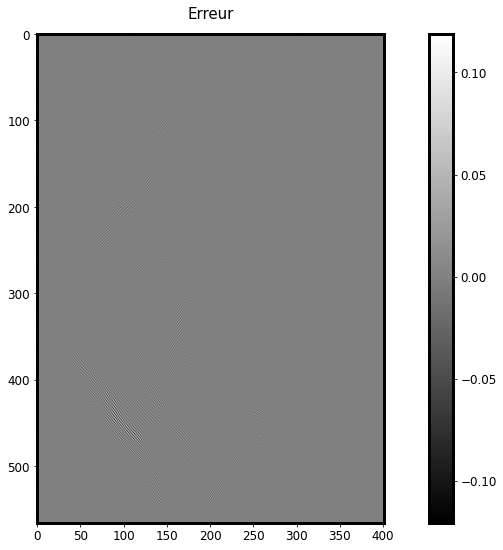

In [11]:
plt.imshow(A-B, cmap='gray'); plt.colorbar(); plt.title('Erreur')
plt.show()